
Initial Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               100 non-null    int64  
 1   Name             100 non-null    object 
 2   Task_id          100 non-null    int64  
 3   Width            100 non-null    int64  
 4   Height           100 non-null    int64  
 5   Drug Name        47 non-null     object 
 6   Dosage           42 non-null     object 
 7   Quantity         32 non-null     float64
 8   Contact number   8 non-null      float64
 9   Date Issued      100 non-null    object 
 10  Email address    15 non-null     object 
 11  Prescriber Name  48 non-null     object 
 12  sex              98 non-null     object 
 13  Age              100 non-null    object 
 14  Patient Name     78 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 11.8+ KB
None

Feature Statistics Bef

C:\Users\eKasi_SWT_COM00862\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eKasi_SWT_COM00862\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eKasi_SWT_COM00862\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C


CROSS-VALIDATION RESULTS

Overall CV Accuracy: 0.450 (+/- 0.253)

Detailed Results by Fold:

Fold 1:
Accuracy: 0.650

Confusion Matrix:
[[5 2]
 [5 8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.80      0.62      0.70        13

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20


Fold 2:
Accuracy: 0.250

Confusion Matrix:
[[4 6 0]
 [8 1 0]
 [1 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.40      0.35        10
           1       0.14      0.11      0.12         9
           2       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.15      0.17      0.16        20
weighted avg       0.22      0.25      0.23        20


Fold 3:
Accuracy: 0

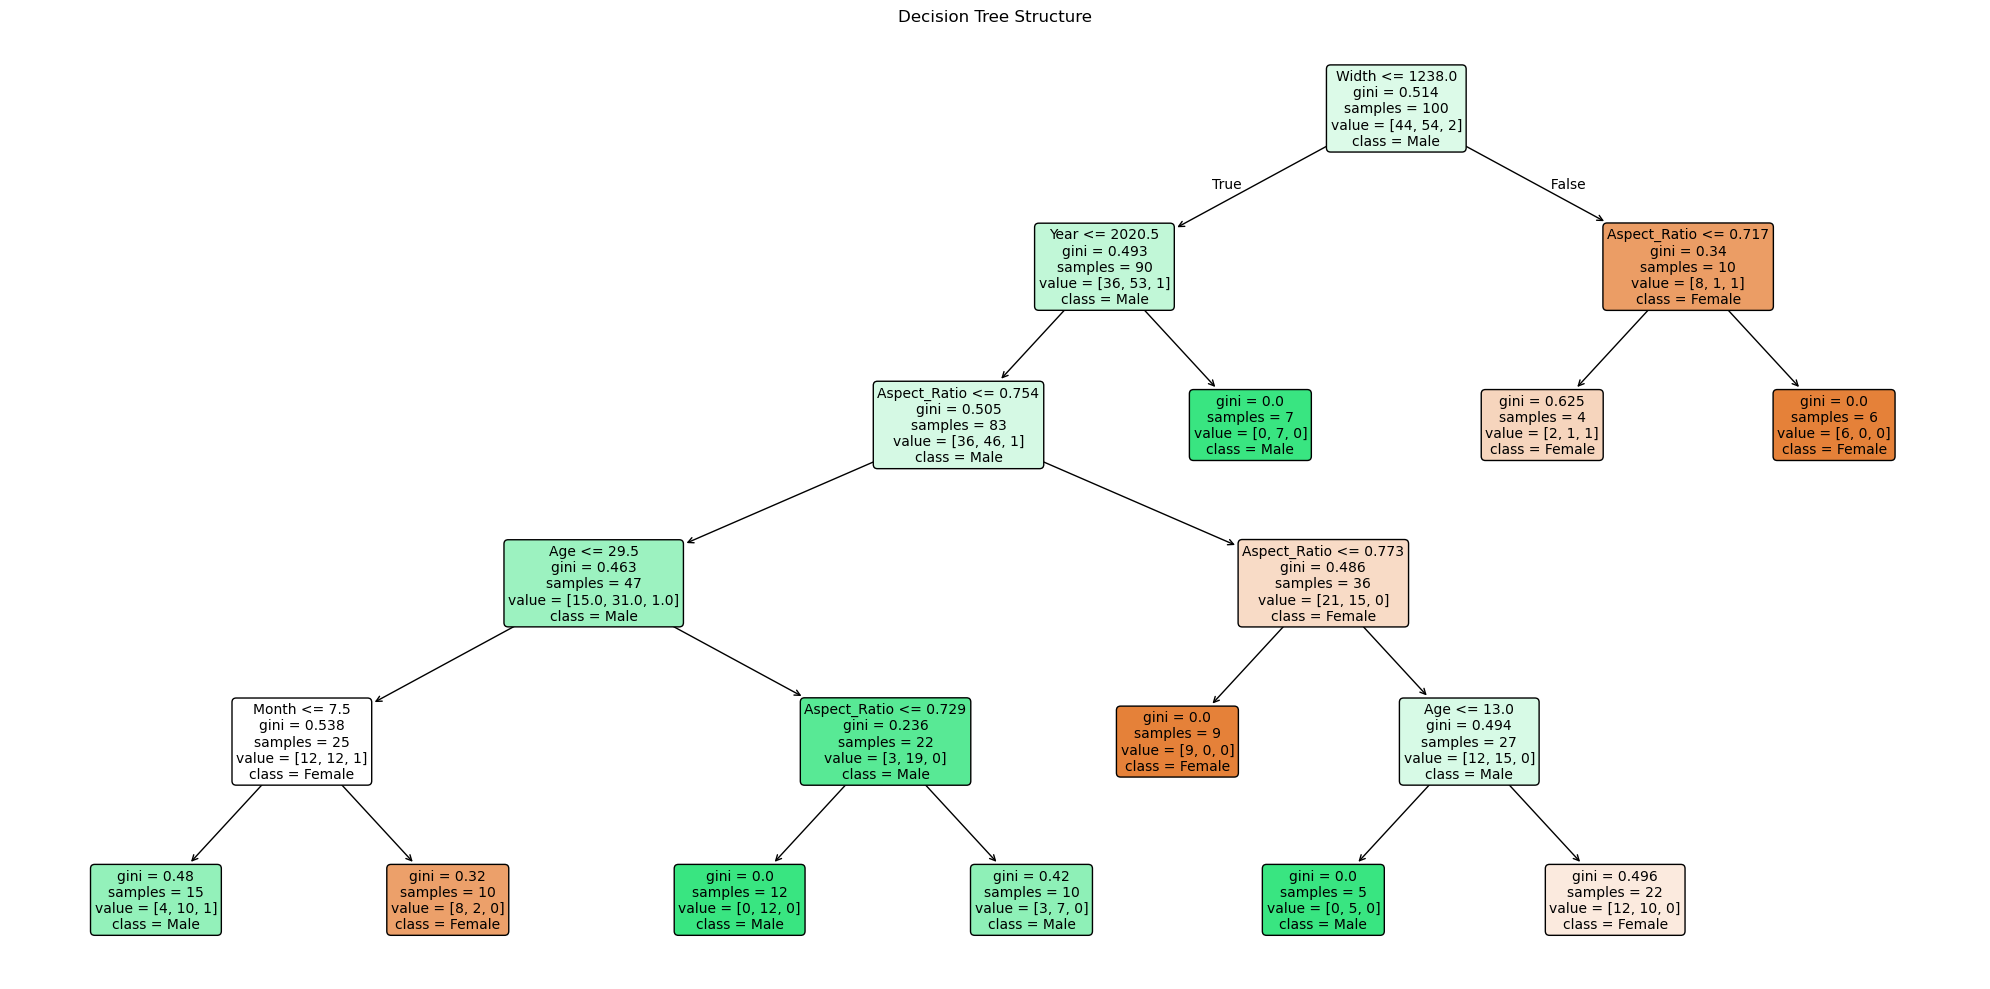

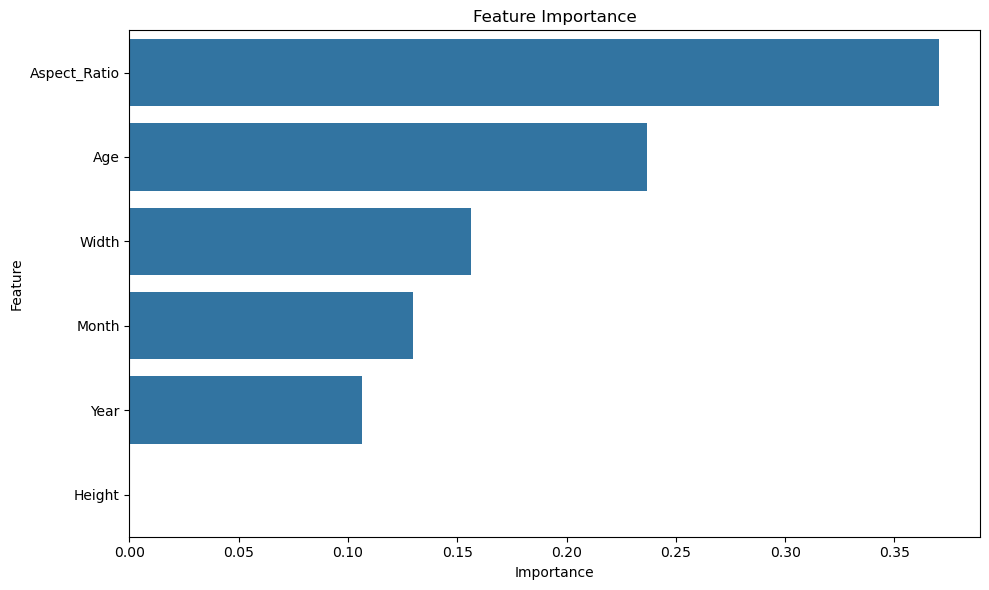

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\eKasi_SWT_COM00862\Desktop\Health_Care_Project\Health_Care_Services.csv")

def clean_age(age_str):
    """Extract numeric value from age string"""
    if pd.isna(age_str):
        return np.nan
    try:
       
        return float(''.join(filter(str.isdigit, str(age_str))))
    except:
        return np.nan

def prepare_data_for_model(df):
    """
    Prepare the healthcare data for modeling by handling missing values,
    encoding categorical variables, and engineering relevant features.
    """
    
    df_model = df.copy()
    
    
    df_model['Age'] = df_model['Age'].apply(clean_age)
    
   
    df_model['Date Issued'] = pd.to_datetime(df_model['Date Issued'], format='mixed', dayfirst=True)
    
    
    df_model['Year'] = df_model['Date Issued'].dt.year
    df_model['Month'] = df_model['Date Issued'].dt.month
    
    
    df_model['Aspect_Ratio'] = df_model['Width'] / df_model['Height']
    
    
    features = [
        'Width', 'Height', 'Aspect_Ratio', 'Age',
        'Year', 'Month'
    ]
    
   
    print("\nFeature Statistics Before Imputation:")
    print("=" * 50)
    for feature in features:
        print(f"\n{feature}:")
        print(f"Missing values: {df_model[feature].isna().sum()}")
        print(f"Unique values: {df_model[feature].nunique()}")
        print(f"Sample values: {df_model[feature].head()}")
    
   
    X = df_model[features]
    
    
    le = LabelEncoder()
    y = le.fit_transform(df_model['sex'])
    
   
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
   
    print("\nFeature Statistics After Imputation:")
    print("=" * 50)
    for feature in features:
        print(f"\n{feature}:")
        print(f"Missing values: {X[feature].isna().sum()}")
        print(f"Unique values: {X[feature].nunique()}")
        print(f"Sample values: {X[feature].head()}")
    
    return X, y, features, le

def perform_cross_validation(X, y, n_splits=5):
    """
    Perform k-fold cross-validation and return detailed results.
    """
   
    dt = DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    
    cv_scores = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')
    
    
    fold_results = []
    fold_number = 1
    
    for train_idx, val_idx in kf.split(X):
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        
        dt.fit(X_train, y_train)
        
        
        y_pred = dt.predict(X_val)
        
        
        fold_results.append({
            'fold': fold_number,
            'accuracy': dt.score(X_val, y_val),
            'confusion_matrix': confusion_matrix(y_val, y_pred),
            'classification_report': classification_report(y_val, y_pred)
        })
        
        fold_number += 1
    
    return cv_scores, fold_results


# Main execution
if __name__ == "__main__":
    # Print initial data info
    print("\nInitial Data Summary:")
    print("=" * 50)
    print(df.info())
    
   
    X, y, features, le = prepare_data_for_model(df)
    
    
    cv_scores, fold_results = perform_cross_validation(X, y)
    
   
    print_cross_validation_results(cv_scores, fold_results)
    
   
    final_model, feature_importance = train_final_model(X, y)
    
   
    plt.close('all')
    tree_viz = visualize_decision_tree(final_model, features, le.classes_)
    
   
    tree_text = print_tree_text(final_model, features, le.classes_)
    print("\nDECISION TREE STRUCTURE (TEXT REPRESENTATION)")
    print("=" * 50)
    print(tree_text)
    
    
    plt.show()